<a href="https://colab.research.google.com/github/SabiJoseph/PRODIGY_DS_01/blob/main/PRODIGY_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# File path for the dataset in Google Drive
file_path = '/content/drive/MyDrive/ProExcel/Spotify_data.xlsx'

# Load the Excel file
data = pd.ExcelFile(file_path)

# Load data from the first sheet
spotify_data = data.parse('Sheet1')

# Display basic information about the dataset
print("Initial Dataset Information:")
spotify_data.info()

# Preview the first few rows
print("\nFirst Few Rows of the Dataset:")
print(spotify_data.head())

# -------------------------------------------
# Check for Missing Values
# -------------------------------------------
print("\nMissing Values in Each Column:")
print(spotify_data.isnull().sum())

# -------------------------------------------
# Handle Missing Values and 'Unknown' Replacement
# -------------------------------------------
spotify_data_cleaned = spotify_data.replace('Unknown', np.nan)
spotify_data_cleaned = spotify_data_cleaned.dropna()

# -------------------------------------------
# Standardize Column Names
# -------------------------------------------
spotify_data_cleaned.columns = spotify_data_cleaned.columns.str.lower().str.replace(' ', '_')

# -------------------------------------------
# Handle Inconsistent Data/Order Format
# -------------------------------------------
print("\nUnique Values in Gender Column (Before Cleaning):")
print(spotify_data_cleaned['gender'].unique())
spotify_data_cleaned.loc[:, 'gender'] = spotify_data_cleaned['gender'].str.capitalize()
print("\nUnique Values in Age Column (Before Cleaning):")
print(spotify_data_cleaned['age'].unique())
age_order = ["12~20", "20~35", "35~60", "60+"]
spotify_data_cleaned.loc[:, 'age'] = pd.Categorical(spotify_data_cleaned['age'], categories=age_order, ordered=True)

# -------------------------------------------
# Remove Duplicates
# -------------------------------------------
print("\nNumber of Duplicate Rows (Before Removal):")
print(spotify_data_cleaned.duplicated().sum())
spotify_data_cleaned = spotify_data_cleaned.drop_duplicates()

# -------------------------------------------
#  Verify Data Types
# -------------------------------------------
spotify_data_cleaned['music_recc_rating'] = pd.to_numeric(spotify_data_cleaned['music_recc_rating'], errors='coerce')

# -------------------------------------------
# Verify Cleaned Data
# -------------------------------------------
print("\nCleaned Dataset Information:")
spotify_data_cleaned.info()
print("\nFirst Few Rows of the Cleaned Dataset:")
print(spotify_data_cleaned.head())

# -------------------------------------------
# Save the Cleaned Dataset
# -------------------------------------------
spotify_data_cleaned.to_csv('/content/drive/MyDrive/ProExcel/Clean_Spotify_Data.csv', index=False)

# checking data set been updated in drive
print("\n Cleaned dataset saved as 'Clean_Spotify_Data.csv'.")

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28546 entries, 0 to 28545
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          28546 non-null  object
 1   Gender                       28546 non-null  object
 2   spotify_usage_period         28546 non-null  object
 3   spotify_listening_device     28546 non-null  object
 4   spotify_subscription_plan    28546 non-null  object
 5   premium_sub_willingness      28546 non-null  object
 6   preffered_premium_plan       20473 non-null  object
 7   preferred_listening_content  28546 non-null  object
 8   fav_music_genre              28546 non-null  object
 9   music_time_slot              28546 non-null  object
 10  music_Influencial_mood       28546 non-null  object
 11  music_lis_frequency          28546 non-null  object
 12  music_expl_method            28546 non-null  object
 13  mu

In [3]:
# Checking types of columns
df = pd.read_csv('/content/drive/MyDrive/ProExcel/Clean_Spotify_Data.csv')
print(spotify_data_cleaned.columns)

Index(['age', 'gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')


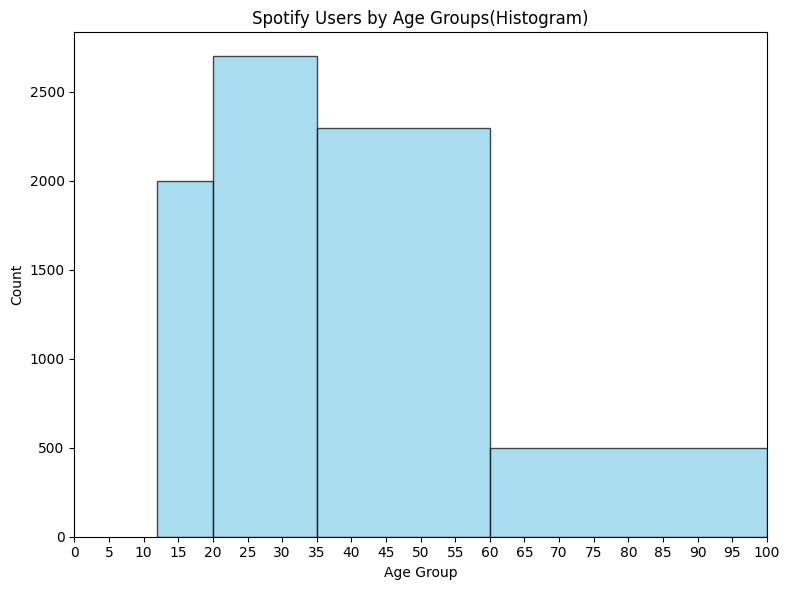

In [4]:
#1. Spotify User by Age Groups
age_group_counts = [2000, 2700, 2300, 500]
age_edges = [12, 20, 35, 60, 100]
plt.figure(figsize=(8, 6))
plt.bar(
    age_edges[:-1],
    age_group_counts,
    width=np.diff(age_edges),
    align="edge",
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
)
plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Spotify Users by Age Groups(Histogram)")
plt.tight_layout()
plt.show()

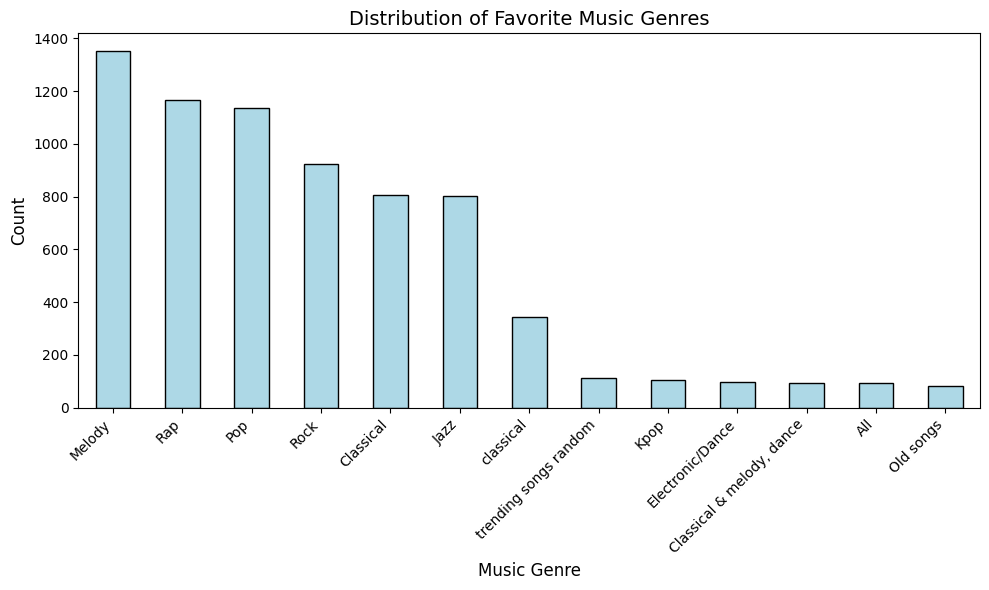

In [5]:

#2. Preferred music genres
plt.figure(figsize=(10, 6))
spotify_data_cleaned['fav_music_genre'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Favorite Music Genres', fontsize=14)
plt.xlabel('Music Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

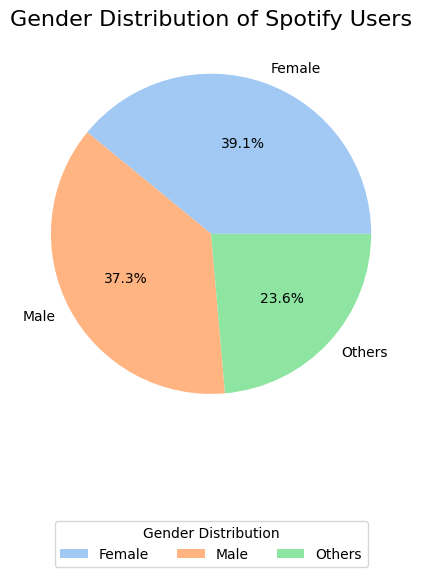

In [6]:
#3. Gender Distribution (Pie Chart)
gender_counts = spotify_data_cleaned['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Gender Distribution of Spotify Users', fontsize=16)
plt.legend(gender_counts.index, title='Gender Distribution', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.tight_layout()
plt.show()

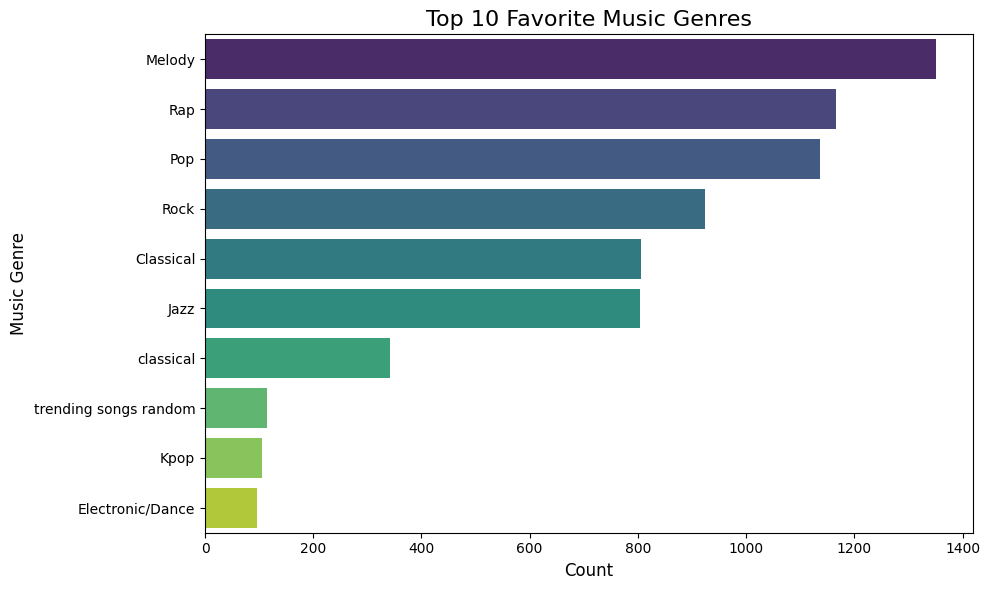

In [7]:
#4. Favorite Music Genres
music_genre_counts = spotify_data_cleaned['fav_music_genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=music_genre_counts.values,
    y=music_genre_counts.index,
    palette='viridis',
    hue=music_genre_counts.index,
    dodge=False,
    legend=False
)
plt.title('Top 10 Favorite Music Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Music Genre', fontsize=12)
plt.tight_layout()
plt.show()


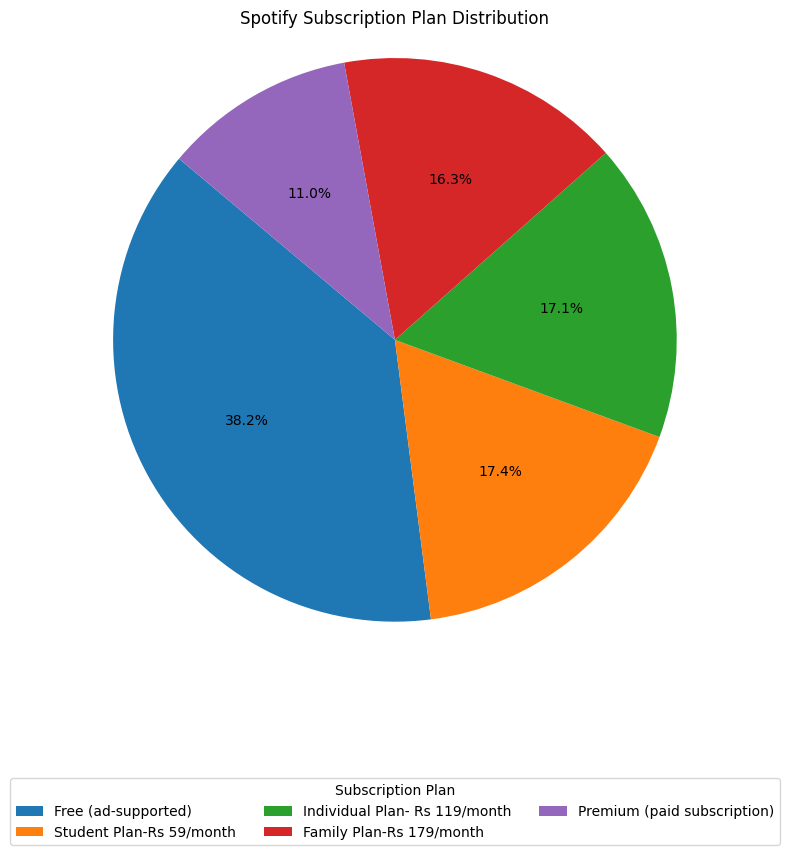

In [8]:
#5. Spotify Subscription Plan
plt.figure(figsize=(8, 8))
subscription_counts = df['spotify_subscription_plan'].value_counts()
plt.pie(subscription_counts, autopct='%1.1f%%', startangle=140)
plt.title('Spotify Subscription Plan Distribution')
plt.axis('equal')
plt.legend(subscription_counts.index, title='Subscription Plan', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.show()

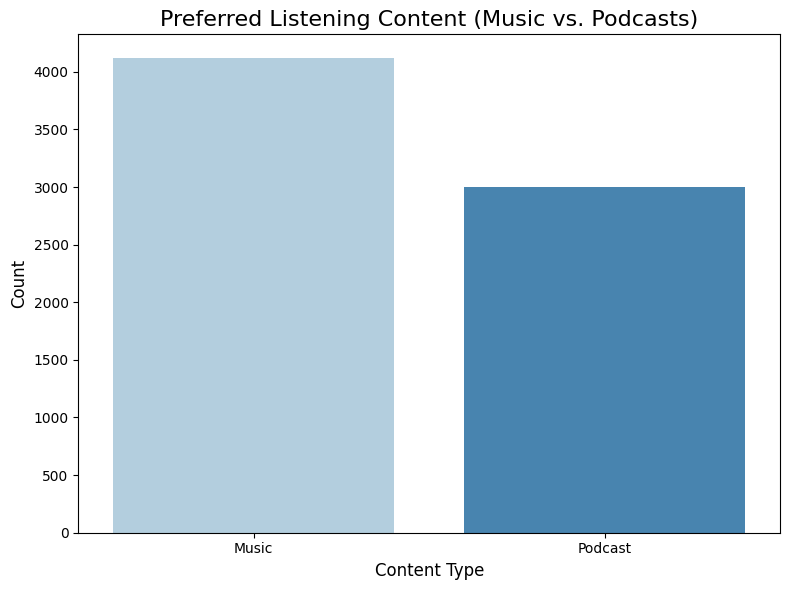

In [9]:
#6. Preferred Listening Content
listening_content_counts = spotify_data_cleaned['preferred_listening_content'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=listening_content_counts.index,
    y=listening_content_counts.values,
    palette='Blues',
    hue=listening_content_counts.index
)
plt.legend([], [], frameon=False)
plt.title('Preferred Listening Content (Music vs. Podcasts)', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


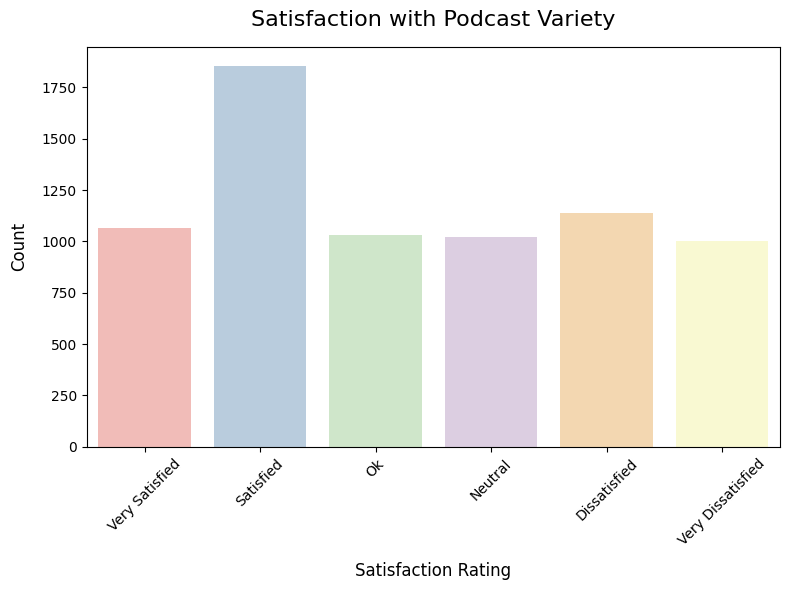

In [10]:
#7. Podcast Satisfaction
satisfaction_order = ['Very Satisfied', 'Satisfied', 'Ok', 'Neutral', 'Dissatisfied', 'Very Dissatisfied']
spotify_data_cleaned['pod_variety_satisfaction'] = spotify_data_cleaned['pod_variety_satisfaction'].replace('Okay', 'Ok')
satisfaction_counts = spotify_data_cleaned['pod_variety_satisfaction'].value_counts()
satisfaction_counts = satisfaction_counts[satisfaction_order]
plt.figure(figsize=(8, 6))
sns.barplot(
    x=satisfaction_counts.index,
    y=satisfaction_counts.values,
    hue=satisfaction_counts.index,
    palette='Pastel1',
    dodge=False
)
plt.title('Satisfaction with Podcast Variety', fontsize=16, pad=15)
plt.xlabel('Satisfaction Rating', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

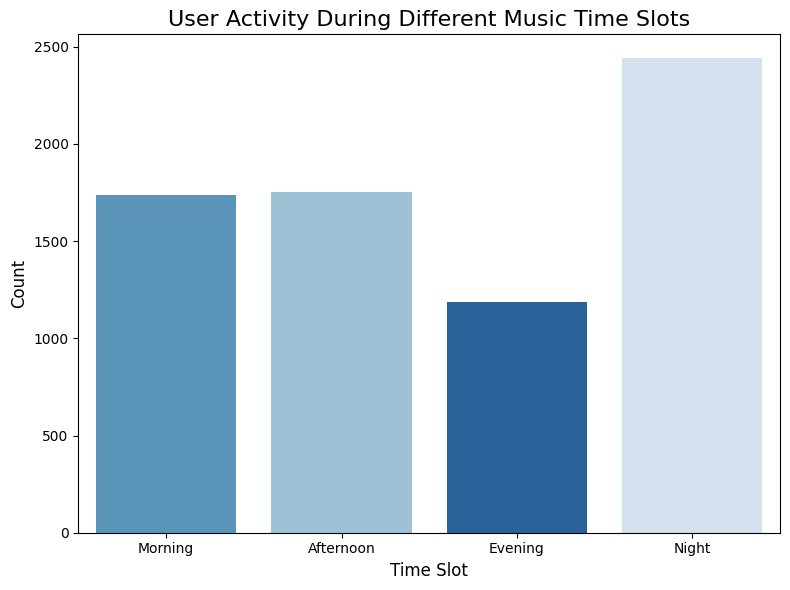

In [11]:
#8. User Activity Based on Different Music Time Slots
time_slot_order = ['Morning', 'Afternoon', 'Evening', 'Night']
music_time_slot_counts = spotify_data_cleaned['music_time_slot'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(
    x=music_time_slot_counts.index,
    y=music_time_slot_counts.values,
    hue=music_time_slot_counts.index,
    palette='Blues',
    order=time_slot_order,
    dodge=False,
    legend=False
)
plt.title('User Activity During Different Music Time Slots', fontsize=16)
plt.xlabel('Time Slot', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


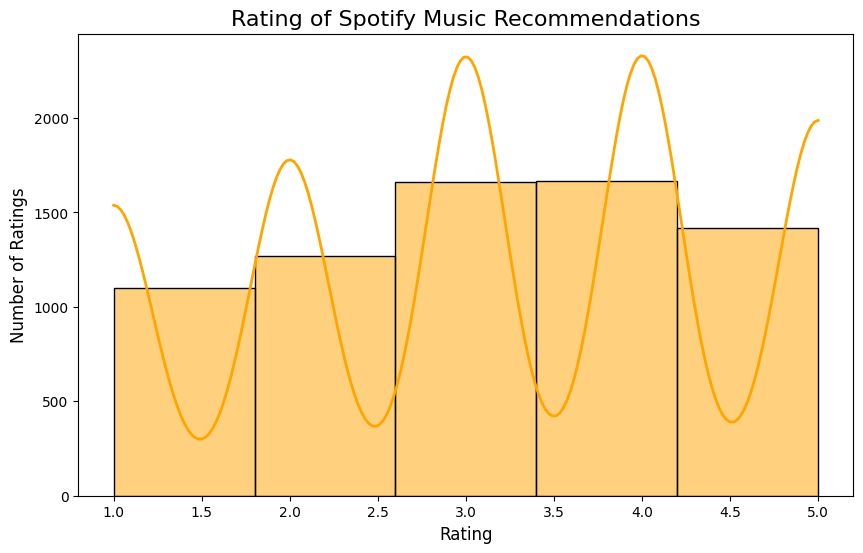

In [12]:

#9. Rating of Spotify Music Recommendations
plt.figure(figsize=(10, 6))
sns.histplot(df['music_recc_rating'], bins=5, kde=True, color='orange', line_kws={'linewidth': 2})
plt.title('Rating of Spotify Music Recommendations', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.show()


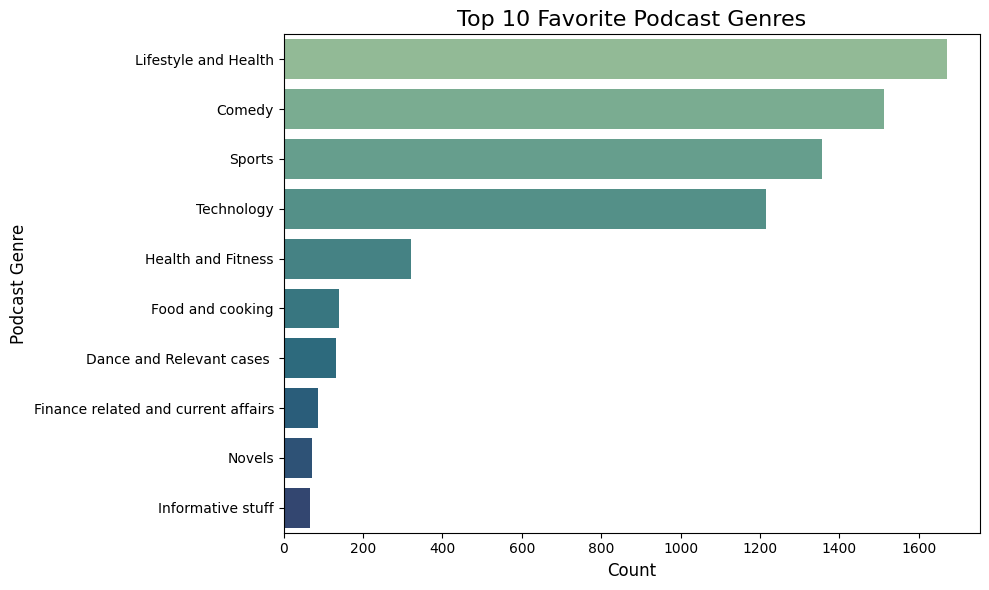

In [13]:

#10. Top Favorite Podcasr Genres
podcast_genre_counts = spotify_data_cleaned['fav_pod_genre'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=podcast_genre_counts.index, x=podcast_genre_counts.values, palette='crest', hue=podcast_genre_counts.index, legend=False)
plt.title('Top 10 Favorite Podcast Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Podcast Genre', fontsize=12)
plt.tight_layout()
plt.show()

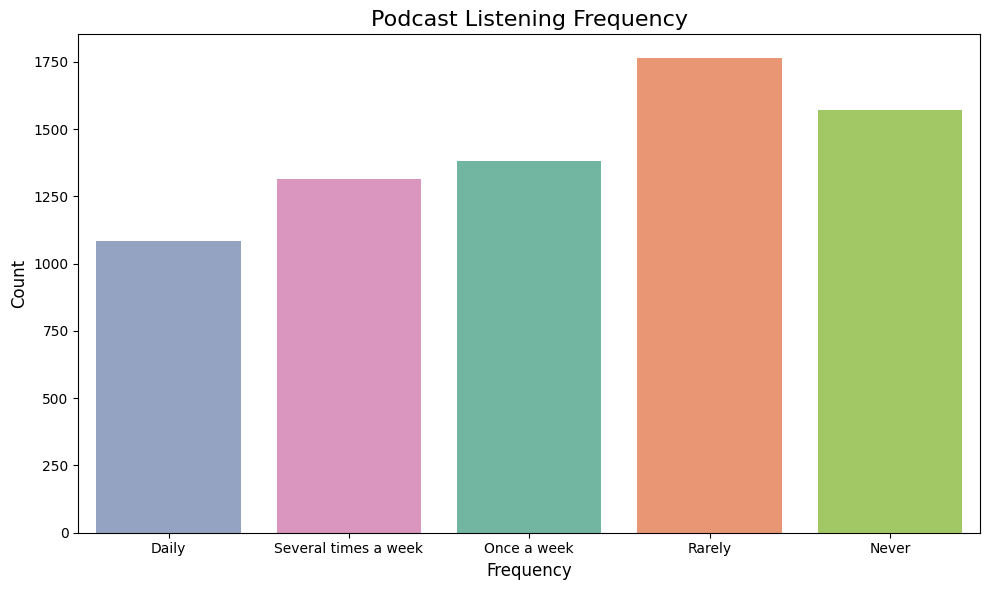

In [14]:
#11. Podcast listening fre
frequency_order = ['Daily', 'Several times a week', 'Once a week', 'Rarely', 'Never']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pod_lis_frequency', palette='Set2', order=frequency_order, hue='pod_lis_frequency', legend=False)
plt.title('Podcast Listening Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()